# Share Price  Prediction

In [589]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [590]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

#To get similar results in each run, seeding is used.
import tensorflow as tf
from numpy.random import seed
seed(1)
tf.random.set_seed(1) 
import tensorflow as tf
from keras.callbacks import EarlyStopping

#Display all rows / columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [591]:
df  = pd.read_csv('/gdrive/My Drive/Colab Notebooks/RNN/RNN Variants/ShareMarketPrediction/RELIANCE.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-08-2020,2051.300049,2057.000000,2003.099976,2009.000000,1996.546753,21559142
1,04-08-2020,2020.599976,2167.000000,2000.250000,2150.600098,2137.269043,42476932
2,05-08-2020,2169.000000,2196.000000,2118.300049,2126.449951,2113.268799,34404810
3,06-08-2020,2157.000000,2167.699951,2107.800049,2134.100098,2120.871582,22762545
4,07-08-2020,2129.800049,2157.800049,2120.199951,2146.449951,2133.144775,15222303


In [592]:
df =df[['Date','Open']]

In [593]:
df.head()

,Date,Open
0,03-08-2020,2051.300049
1,04-08-2020,2020.599976
2,05-08-2020,2169.000000
3,06-08-2020,2157.000000
4,07-08-2020,2129.800049


In [594]:
df.isnull().sum()

Date    0
Open    0
dtype: int64

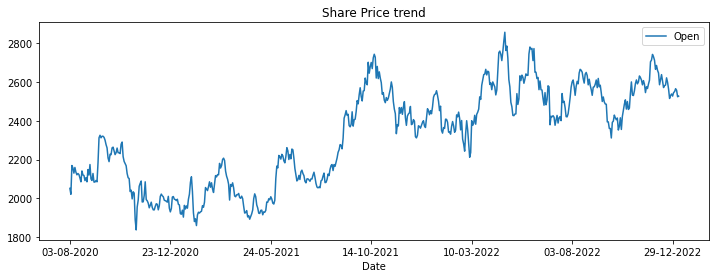

In [595]:

df.plot(x = 'Date',y = 'Open',figsize=(12, 4),kind = 'line',title = 'Share Price trend')

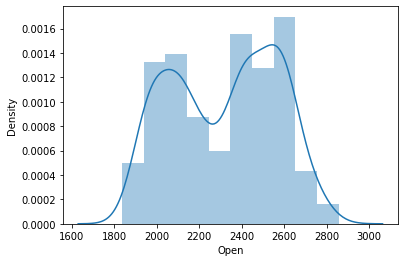

In [596]:
sns.distplot(df['Open'])

In [597]:
df_copy = df

In [598]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df[['Open']])

In [599]:
type(scaled)

numpy.ndarray

Train test split

In [600]:
train_size = int(len(scaled)*.70) #70% examples will used for training (in the begining)
test_size = len(scaled - train_size) #30% will be used for Test

#Split the data
train,test = scaled[0:train_size,:],scaled[train_size:len(scaled),:]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 424
test: 183


### Build Input and Output data
for both Training and Test

In [601]:
#window - how long the sequence will be
def create_dataset(dataset, window=1):
    
    dataX, dataY = [], []
    
    for i in range(len(dataset)-window):
        
        a = dataset[i:(i+window), 0]        
        dataX.append(a)
        dataY.append(dataset[i + window, 0])
    
    return np.array(dataX), np.array(dataY)

In [602]:
#Create Input and Output
window_size = 5
X_train, y_train = create_dataset(train, window_size)
X_test, y_test = create_dataset(test, window_size)

In [603]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((419, 5), (419,), (178, 5), (178,))

In [604]:
pd.DataFrame(X_test).head()

,0,1,2,3,4
0,0.859645,0.960349,1.359544,1.737387,1.769613
1,0.960349,1.359544,1.737387,1.769613,1.703148
2,1.359544,1.737387,1.769613,1.703148,1.572635
3,1.737387,1.769613,1.703148,1.572635,1.757328
4,1.769613,1.703148,1.572635,1.757328,1.975252


In [605]:
pd.DataFrame(y_test).head()

,0
0,1.703148
1,1.572635
2,1.757328
3,1.975252
4,2.161354


In [606]:
pd.DataFrame(X_train).head()

,0,1,2,3,4
0,-1.080735,-1.204401,-0.606617,-0.654955,-0.764522
1,-1.204401,-0.606617,-0.654955,-0.764522,-0.646496
2,-0.606617,-0.654955,-0.764522,-0.646496,-0.744381
3,-0.654955,-0.764522,-0.646496,-0.744381,-0.799970
4,-0.764522,-0.646496,-0.744381,-0.799970,-0.771773


In [607]:
pd.DataFrame(y_train).head()

,0
0,-0.646496
1,-0.744381
2,-0.799970
3,-0.771773
4,-0.793726


In [608]:
train

array([[-1.08073508e+00],
       [-1.20440086e+00],
       [-6.06617121e-01],
       [-6.54955421e-01],
       [-7.64522036e-01],
       [-6.46495824e-01],
       [-7.44381078e-01],
       [-7.99970320e-01],
       [-7.71772979e-01],
       [-7.93726426e-01],
       [-8.64421387e-01],
       [-9.44985220e-01],
       [-7.19406487e-01],
       [-8.03998512e-01],
       [-8.12054895e-01],
       [-9.19205188e-01],
       [-8.60393195e-01],
       [-9.44985220e-01],
       [-6.91209146e-01],
       [-8.03998512e-01],
       [-5.86476163e-01],
       [-8.84562345e-01],
       [-9.16787878e-01],
       [-7.71772979e-01],
       [-9.50825900e-01],
       [-9.49013411e-01],
       [-9.16787878e-01],
       [-9.44985220e-01],
       [-5.49819224e-01],
       [-3.05857152e-02],
       [ 2.17807762e-02],
       [-3.07873222e-02],
       [ 1.63981797e-03],
       [ 1.63981797e-03],
       [-2.15222840e-02],
       [-7.89240150e-02],
       [-1.71572423e-01],
       [-2.40051681e-01],
       [-4.4

Make it 3 Dimensional Data - needed for LSTM

In [609]:
X_train.shape

(419, 5)

In [610]:
#Make it 3 Dimensional Data - needed for LSTM
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test =  np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
print(X_train.shape)
print(X_test.shape)

(419, 5, 1)
(178, 5, 1)


# Model building

In [611]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(256,input_shape=(window_size , 1),return_sequences = True)) # return_sequences=True means stacked LSTM cells-used to learn deeper features
model.add(tf.keras.layers.LSTM(256,return_sequences = True))
model.add(tf.keras.layers.LSTM(256))

In [612]:
model.output

<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'lstm_2')>

In [613]:
model.add(tf.keras.layers.Dense(50))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(1))
#model.compile(optimizer = 'adam',loss = 'mse')
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2),loss = 'mse')
#tf.keras.optimizers.Adam(learning_rate=1e-3)


In [614]:
#

# Callback implementation

In [615]:
from tensorflow.keras.callbacks import EarlyStopping

In [616]:
# This callback will stop the training when there is no improvement in the loss for three consecutive epochs.
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'loss',patience = 5,mode = 'auto')

In [617]:
history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), batch_size = 16, shuffle = True, callbacks = [early_stopping])

Epoch 1/100
27/27 [==============================] - 5s 48ms/step - loss: 5.9241 - val_loss: 0.8987
Epoch 2/100
27/27 [==============================] - 0s 10ms/step - loss: 0.4191 - val_loss: 1.0505
Epoch 3/100
27/27 [==============================] - 0s 11ms/step - loss: 0.4404 - val_loss: 0.1988
Epoch 4/100
27/27 [==============================] - 0s 9ms/step - loss: 0.3322 - val_loss: 0.1117
Epoch 5/100
27/27 [==============================] - 0s 11ms/step - loss: 0.3317 - val_loss: 0.1115
Epoch 6/100
27/27 [==============================] - 0s 11ms/step - loss: 0.2746 - val_loss: 0.1067
Epoch 7/100
27/27 [==============================] - 0s 10ms/step - loss: 0.2620 - val_loss: 0.3951
Epoch 8/100
27/27 [==============================] - 0s 10ms/step - loss: 0.2370 - val_loss: 0.1429
Epoch 9/100
27/27 [==============================] - 0s 10ms/step - loss: 0.2142 - val_loss: 0.1264
Epoch 10/100
27/27 [==============================] - 0s 11ms/step - loss: 0.1655 - val_loss: 0.1489


0s 9ms/step - loss: 0.0925 - val_loss: 0.1401 # for 29th epoch
Epoch 18/100
22/22 [==============================] - 0s 10ms/step - loss: 0.0977 - val_loss: 0.0787
3.Epoch 29/100
22/22 [==============================] - 0s 10ms/step - loss: 0.0925 - val_loss: 0.1445
4.Epoch 29/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0925 - val_loss: 0.3626

In [618]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


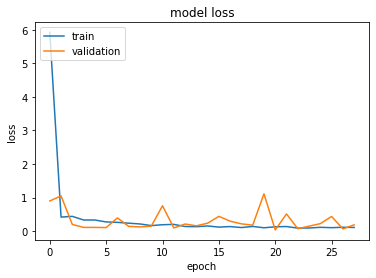

In [619]:
#Plotting model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

# Visualize prediction

In [620]:
#Get prediction for both Training and Test Data
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)


6/6 [==============================] - 0s 4ms/step


Lets review sample prediction

In [621]:
X_test[-1]

array([[0.90838615],
       [0.9281239 ],
       [0.98874838],
       [0.95632124],
       [0.82137682]])

In [622]:
testPredict[-1]

array([0.6304253], dtype=float32)

In [623]:
#checking X_test[-1] in original unit ie original share price of X_test[-1]
scaler.inverse_transform(X_test[-1].reshape(-1,1))

array([[2545.100098],
       [2550.      ],
       [2565.050049],
       [2557.      ],
       [2523.5     ]])

# Next day price prediction

In [624]:
#checking testPredict[0] in original unit ie predicted share price for X_test[-1] ie Next day price prediction
scaler.inverse_transform(testPredict[-1].reshape(-1,1))

array([[2476.0962]], dtype=float32)

In [625]:

df_copy[350:-1] # verying X_test[0] with original dataset

,Date,Open
350,28-12-2021,2375.600098
351,29-12-2021,2391.000000
352,30-12-2021,2400.000000
353,31-12-2021,2373.000000
354,03-01-2022,2365.000000
355,04-01-2022,2415.899902
356,05-01-2022,2462.000000
357,06-01-2022,2451.199951
358,07-01-2022,2430.949951
359,10-01-2022,2452.000000


## Un-normalize the predited data

In [626]:
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

##Lets view predicted result of test data


In [627]:
Share_precition = pd.DataFrame(testPredict)

Share_precition.columns = ['PridictedSharePrice']

In [628]:
#Saving the predicted df
Share_precition.to_excel('/gdrive/My Drive/Colab Notebooks/RNN/RNN Variants/ShareMarketPrediction/Share_precition_df.xlsx',index = False)

# Metrics

In [629]:
rmse_train = np.sqrt(mean_squared_error(y_train, trainPredict)).round(2)

rmse_test = np.sqrt(mean_squared_error(y_test, testPredict)).round(2)

print('RMSE train = {0}\nRMSE test = {1}'.format(rmse_train,rmse_test))

RMSE train = 2356.57
RMSE test = 2482.43


# Visulaization

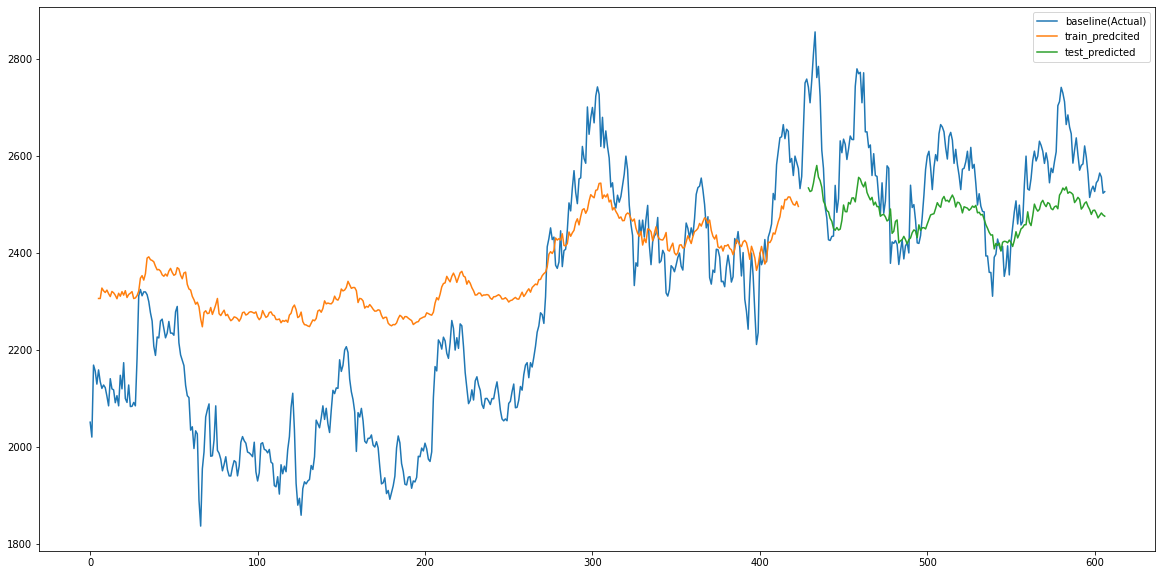

In [630]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(scaled) # np.empty_like() Return a new array with the same shape and type as a given array.
trainPredictPlot[:, :] = np.nan
trainPredictPlot[window_size:len(trainPredict)+window_size, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(window_size*2):len(scaled), :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled),label = 'baseline(Actual)')
plt.plot(trainPredictPlot,label = 'train_predcited')
plt.plot(testPredictPlot,label = 'test_predicted')
plt.legend(loc = 'best')
plt.show()

In [631]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 256)            264192    
                                                                 
 lstm_1 (LSTM)               (None, 5, 256)            525312    
                                                                 
 lstm_2 (LSTM)               (None, 256)               525312    
                                                                 
 dense (Dense)               (None, 50)                12850     
                                                                 
 batch_normalization (BatchN  (None, 50)               200       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                        